In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('slr_exp_salary.csv')
df.head()

,Years_Experience,Salary_1000s
0,1.0,41.2
1,1.1,39.8
2,1.1,43.5
3,1.2,38.9
4,1.3,44.2


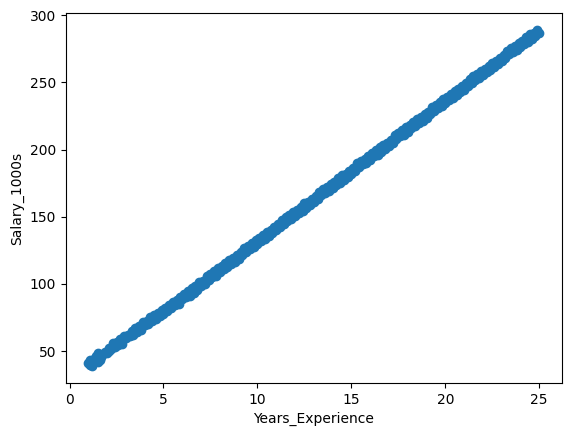

In [4]:
plt.scatter(df['Years_Experience'],df['Salary_1000s'])
plt.xlabel('Years_Experience')
plt.ylabel('Salary_1000s')
plt.show()

In [5]:
df.corr()

,Years_Experience,Salary_1000s
Years_Experience,1.000000,0.999616
Salary_1000s,0.999616,1.000000


Highly correlated

In [6]:
X = df[['Years_Experience']]
X.shape

(244, 1)

In [7]:
y = df['Salary_1000s']
y.shape

(244,)

In [8]:
# Train test split
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.shape

(183, 1)

In [11]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.09414569],
       [ 0.8448235 ],
       [ 1.47080297],
       [-0.76280558],
       [-0.25064056],
       [-0.74857877],
       [-0.15105292],
       [ 1.20049365],
       [ 0.61719461],
       [ 0.46069974],
       [ 1.34276171],
       [-0.60631071],
       [-1.31765101],
       [ 1.59884422],
       [ 1.49925658],
       [ 0.8305967 ],
       [-1.63064074],
       [-0.93352725],
       [ 0.04812237],
       [ 0.3753389 ],
       [-0.1083725 ],
       [-0.80548599],
       [ 0.14771001],
       [ 1.21472046],
       [ 0.57451419],
       [-1.2891974 ],
       [-1.54527991],
       [-1.23229017],
       [-1.33187782],
       [-1.13270253],
       [ 1.66997825],
       [ 0.06234917],
       [-0.40713543],
       [ 0.6029678 ],
       [-1.00466128],
       [-0.37868181],
       [ 0.26152446],
       [ 1.02977198],
       [-0.64899113],
       [-1.14692934],
       [-0.19373334],
       [ 1.44234935],
       [-0.62053752],
       [ 0.31843168],
       [-1.36033143],
       [ 1

In [14]:
X_test = scaler.transform(X_test)
X_test

array([[-1.38878504],
       [-1.61641394],
       [ 0.44647293],
       [ 1.27162768],
       [ 1.0866792 ],
       [ 0.77368947],
       [ 1.00131837],
       [ 0.03389556],
       [-1.58796032],
       [-0.29332098],
       [-1.09002211],
       [ 1.58461741],
       [-0.06569208],
       [ 0.78791628],
       [-0.56363029],
       [ 0.34688529],
       [ 1.11513282],
       [-1.51682629],
       [-0.79125919],
       [ 0.28997807],
       [-1.26074379],
       [-1.45991907],
       [-0.17950653],
       [-1.3034242 ],
       [ 0.91595753],
       [-0.02301166],
       [-1.57373352],
       [-0.69167155],
       [ 0.53183377],
       [ 0.48915335],
       [-0.13682611],
       [ 1.37121532],
       [-1.37455823],
       [-0.87662002],
       [-1.47414588],
       [-0.03723847],
       [-0.3502282 ],
       [ 1.0724524 ],
       [ 0.24729765],
       [ 1.69843186],
       [-0.66321793],
       [ 0.07657598],
       [-0.12259931],
       [-1.50259949],
       [ 1.05822559],
       [-0

In [15]:
# Apply Simple LinearRegression
from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression(n_jobs=-1)

In [17]:
regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
print("Coefficient or Slope : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient or Slope :  [73.17333575]
Intercept :  161.76393442622953


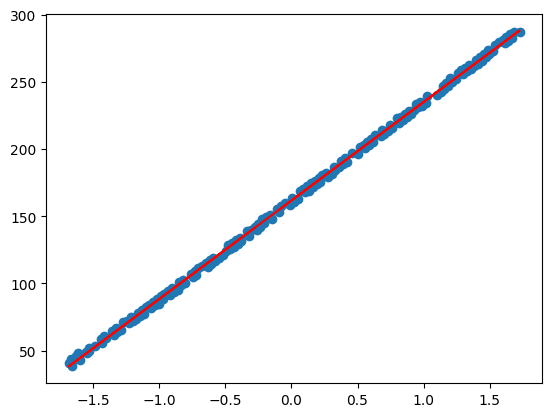

In [20]:
# Plot training data best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')

Prediction of test data<br>
1.predict Salary output = intercept + coef_(Years_Experience)<br>
2.y_pred_test = 161.76 + 73.17(X_test)

In [21]:
# Prediction of test data
y_pred = regression.predict(X_test)

In [22]:
# Performance metrices
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [24]:
print("MSE : ",mse)
print("MAE : ",mae)
print("RMSE : ",rmse)

MSE :  4.189828183131535
MAE :  1.8972148498778525
RMSE :  2.046906979599106


In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(y_test,y_pred)
print(score)

0.9992203181548169


In [32]:
# Predicting on new data
print("Expected Salary(12.2 years Exp) : ",regression.predict(scaler.transform([[12.2]])))

Expected Salary(12.2 years Exp) :  [154.87497993]


d:\ML-Fundamentals-Lab\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


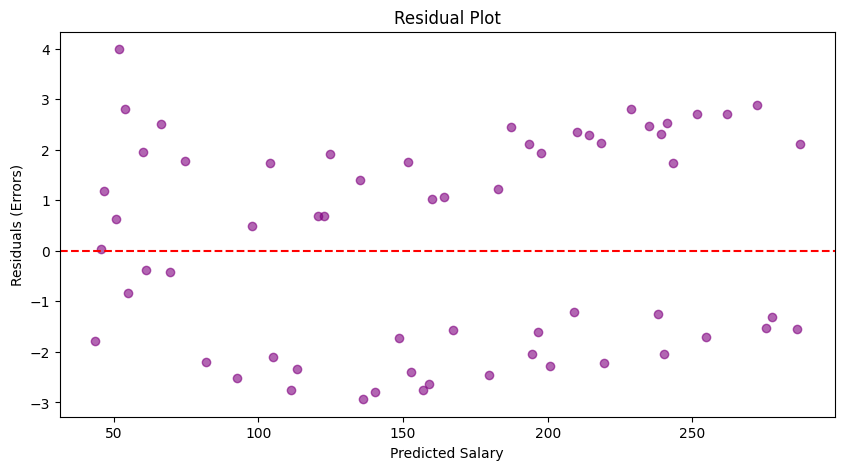

In [33]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals (Errors)')
plt.show()